In [1]:
%matplotlib inline




Plotting with Geoplot and GeoPandas
-----------------------------------

`Geoplot <https://residentmario.github.io/geoplot/index.html>`_ is a Python
library providing a selection of easy-to-use geospatial visualizations. It is
built on top of the lower-level `CartoPy <http://scitools.org.uk/cartopy/>`_,
covered in a separate section of this tutorial, and is designed to work with
GeoPandas input.

This example is a brief tour of the `geoplot` API. For more details on the
library refer to `its documentation
<https://residentmario.github.io/geoplot/index.html>`_.

First we'll load in the data using GeoPandas.



In [2]:
import geopandas

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
# Add a column we'll use later
df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']

boroughs = geopandas.read_file(geopandas.datasets.get_path('nybb')).to_crs(epsg='4326')
injurious_collisions = geopandas.read_file(
    "https://github.com/ResidentMario/geoplot-data/raw/master/nyc-injurious-collisions.geojson")

Plotting with Geoplot
=====================

We start out by replicating the basic GeoPandas world plot using Geoplot.



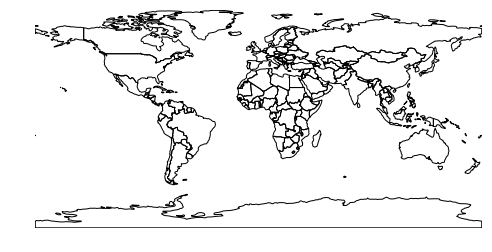

In [3]:
import geoplot

geoplot.polyplot(df, figsize=(8, 4))

Geoplot can re-project data into any of the map projections provided by
CartoPy (see the list
`here <http://scitools.org.uk/cartopy/docs/latest/crs/projections.html>`_).



``polyplot`` is trivial and can only plot the geometries you pass to it. If
you want to use color as a visual variable, specify a ``choropleth``. Here
we sort GDP per person by country into five buckets by color.



/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


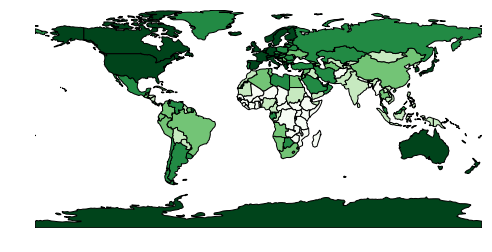

In [5]:
geoplot.choropleth(df, hue='gdp_pp', cmap='Greens', figsize=(8, 4))

If you want to use size as a visual variable, you want a ``cartogram``. Here
are population estimates for countries in Africa.



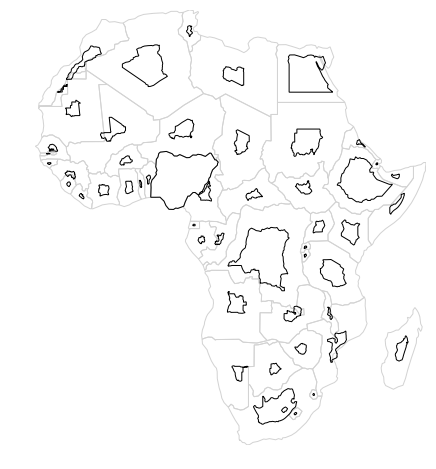

In [6]:
geoplot.cartogram(df[df['continent'] == 'Africa'],
                  scale='pop_est', limits=(0.2, 1), figsize=(7, 8))

If we have data in the shape of points in space, we may generate a
three-dimensional heatmap on it using ``kdeplot``. This example also
demonstrates how easy it is to stack plots on top of one another.



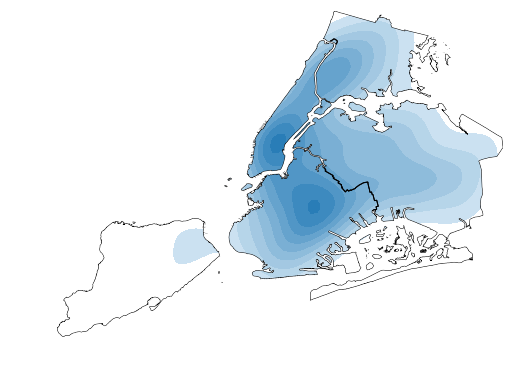

In [7]:
ax = geoplot.kdeplot(injurious_collisions.sample(1000),
                     shade=True, shade_lowest=False,
                     clip=boroughs.geometry)
geoplot.polyplot(boroughs, ax=ax)

Alternatively, we may partition the space into neighborhoods automatically,
using Voronoi tessellation.



Again, these are just some of the plots you can make with Geoplot. There are
several other possibilities not covered in this brief introduction. For more
examples, refer to the
`Gallery <https://residentmario.github.io/geoplot/gallery.html>`_ in the
Geoplot documentation.

